In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from autogluon.tabular import TabularDataset, TabularPredictor

## Data

In [2]:
pH = [3.3, 3.6, 3.9, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.4, 4.75, 4.9, 4.95, 5.07, 5.15, 5.3, 5.7, 9, 10.6, 10.9, 11.05, 11.1, 11.1, 11.1, 11.15, 11.18]
vol = [0, 4, 6.5, 7.8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 18.5, 19, 19.5, 20, 21, 22, 23, 24, 25, 26, 27, 30]

## AutoGluon Model Fitting

In [3]:
df = pd.DataFrame({"vol": vol, "pH": pH})
df2 = pd.DataFrame({"vol": np.linspace(0, 30, 100)})
predictor = TabularPredictor(label="pH").fit(df, presets = "best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20240924_043415/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=5, num_bag_sets=1
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240924_043415/"
AutoGluon Version:  0.7.0
Python Version:     3.9.15
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 23.6.0: Mon Jul 29 21:14:30 PDT 2024; root:xnu-10063.141.2~1/RELEASE_ARM64_T6000
Train Data Rows:    26
Train Data Columns: 1
Label Column: pH
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (11.18, 3.3, 6.65192, 3.14456)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['bin

In [4]:
y_pred = predictor.predict(df2)
display(df2)

,vol
0,0.000000
1,0.303030
2,0.606061
3,0.909091
4,1.212121
...,...
95,28.787879
96,29.090909
97,29.393939
98,29.696970


## Data Vizualization

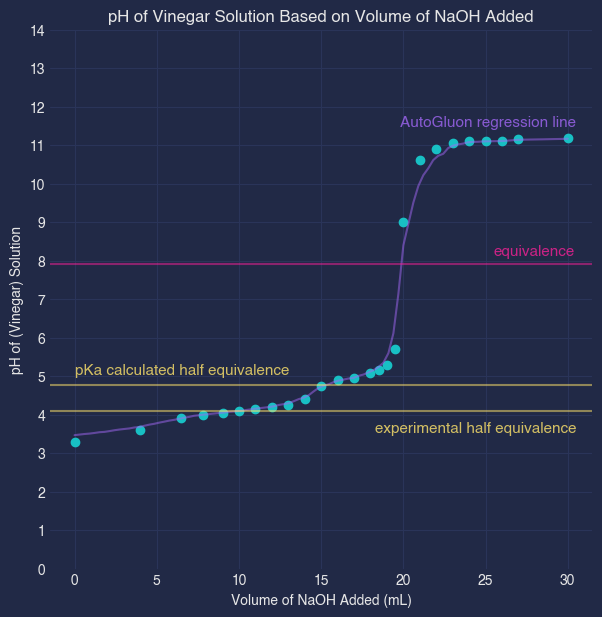

In [8]:
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")
plt.figure(figsize=(7, 7))
x = np.linspace(0, 30, 100)
plt.plot(x, list(y_pred), color='#A267F5', alpha=0.5)
plt.text(19.8, 11.5, r'AutoGluon regression line', fontsize=11, color="#A267F5", alpha=0.8)
plt.scatter(vol, pH)
plt.axhline(7.9, color='#f62196', alpha=0.5)
plt.text(25.5, 8.15, r'equivalence', fontsize=11, color="#f62196", alpha=0.8)
plt.axhline(4.1, color='#ffe46b', alpha=0.5)
plt.text(18.3, 3.55, r'experimental half equivalence', fontsize=11, color="#ffe46b", alpha=0.8)
plt.axhline(4.76, color='#ffe46b', alpha=0.5)
plt.text(0.0, 5.05, r'pKa calculated half equivalence', fontsize=11, color="#ffe46b", alpha=0.8)
plt.yticks([tick for tick in range(0,15)])
plt.ylim([0, 14])
plt.xlabel("Volume of NaOH Added (mL)")
plt.ylabel("pH of (Vinegar) Solution")
plt.title("pH of Vinegar Solution Based on Volume of NaOH Added")
plt.grid()
plt.grid()
plt.savefig('ChemTitrations.png')
plt.show()